In [54]:
import keras
from keras.models import Sequential
from keras.layers import Dense , Dropout, Flatten , Conv2D , MaxPooling2D , GRU
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.utils import plot_model
import numpy as np
import librosa
import matplotlib.pyplot as plt
import os
import seaborn as sns
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from keras.constraints import non_neg, max_norm
from sklearn.metrics import confusion_matrix

In [6]:
DATA_PATH = 'npy-files'

def get_labels(path=DATA_PATH):
    labels = os.listdir(path)
    #print(labels)
    labels_indices = np.arange(0, len(labels))
    #print(labels_indices)
    return labels, labels_indices, to_categorical(labels_indices)

def get_train_test(split_ratio=0.8, random_state=42):
    labels, indices, _ = get_labels()
    print(labels)
    print(indices)
    X = np.load(DATA_PATH+'/'+labels[0] )
    #print(X.shape)
    y = np.zeros(X.shape[0])

    for i, label in enumerate(labels[1:]):
        x = np.load(DATA_PATH+'/'+label )
        X = np.vstack((X, x))
        y = np.append(y, np.full(x.shape[0], fill_value=(i + 1)))
    assert X.shape[0] == len(y)

    return train_test_split(X, y, test_size=(1 - split_ratio), random_state=random_state)

In [11]:
OUTPUT_PATH = 'OUTPUT/'
EPOCHS = 10

CLASSES_NUM = 3

In [12]:
X_train, X_test, y_train, y_test = get_train_test()

['not_wake.npy', 'output.npy', 'wake.npy']
[0 1 2]


In [13]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1275, 31, 16) (1275,) (319, 31, 16) (319,)


In [57]:
X_train[0].shape

(31, 16)

In [14]:
y_train_hot = to_categorical(y_train,num_classes=CLASSES_NUM)
y_test_hot = to_categorical(y_test,num_classes=CLASSES_NUM)

In [19]:
model = Sequential()
model.add(Dropout(0.0, input_shape=(31,16)))
model.add(GRU(20,activation='linear',return_sequences=True))
model.add(Dropout(0.3))
model.add(GRU(20, activation='linear'))
model.add(Dropout(0.3))
model.add(Dense(20, activation='linear'))
model.add(Dropout(0.3))
model.add(Dense(3, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_9 (Dropout)          (None, 31, 16)            0         
_________________________________________________________________
gru_5 (GRU)                  (None, 31, 20)            2220      
_________________________________________________________________
dropout_10 (Dropout)         (None, 31, 20)            0         
_________________________________________________________________
gru_6 (GRU)                  (None, 20)                2460      
_________________________________________________________________
dropout_11 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 20)                420       
_________________________________________________________________
dropout_12 (Dropout)         (None, 20)                0         
__________

In [20]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [21]:
history  = model.fit(X_train, y_train_hot,batch_size=128,epochs=30,verbose=1,validation_data=(X_test, y_test_hot))

Instructions for updating:
Use tf.cast instead.
Train on 1275 samples, validate on 319 samples
Epoch 1/30
1275/1275 [==============================] - 4s 3ms/step - loss: 1.4374 - acc: 0.4486 - val_loss: 0.7016 - val_acc: 0.8088
Epoch 2/30
1275/1275 [==============================] - 1s 433us/step - loss: 0.7129 - acc: 0.7843 - val_loss: 0.3262 - val_acc: 0.9216
Epoch 3/30
1275/1275 [==============================] - 1s 442us/step - loss: 0.4779 - acc: 0.8643 - val_loss: 0.2103 - val_acc: 0.9216
Epoch 4/30
1275/1275 [==============================] - 1s 431us/step - loss: 0.3317 - acc: 0.8863 - val_loss: 0.1818 - val_acc: 0.9248
Epoch 5/30
1275/1275 [==============================] - 1s 444us/step - loss: 0.2784 - acc: 0.8910 - val_loss: 0.1611 - val_acc: 0.9248
Epoch 6/30
1275/1275 [==============================] - 1s 441us/step - loss: 0.2447 - acc: 0.8957 - val_loss: 0.1418 - val_acc: 0.9279
Epoch 7/30
1275/1275 [==============================] - 1s 432us/step - loss: 0.2395 - acc:

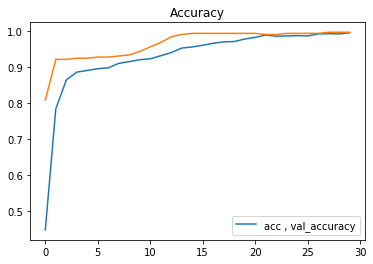

In [29]:
plt.plot(history.history["acc"] ,label = "accuracy")
plt.plot(history.history["val_acc"], label = "val_accuracy")
plt.title("Accuracy")
plt.legend(labels = ["acc , val_accuracy"] , loc ="lower right")
plt.show()

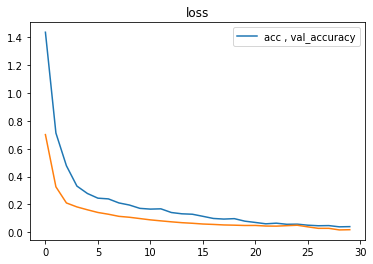

In [33]:
plt.plot(history.history["loss"] )
plt.plot(history.history["val_loss"])
plt.title("loss")
plt.legend(labels = ["acc , val_accuracy"] , loc ="upper right")
plt.show()

In [40]:
pred = model.predict(X_test)
pred = np.argmax(pred , axis=1)
pred

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,

In [44]:
y_test = np.argmax(y_test_hot, axis=1)
y_test

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,

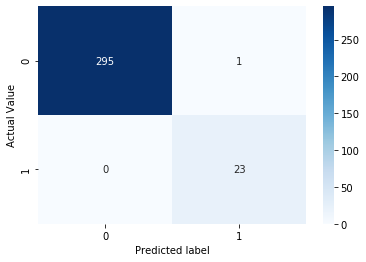

In [55]:
cm = confusion_matrix(pred, y_test)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
plt.xlabel('Predicted label')
plt.ylabel('Actual Value')
plt.show()

In [56]:
model.save("tambhi.h5")